In [1]:
#Importing the neccesary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
dataset = pd.read_csv('E:\Sankhyana Training\Datasets\Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.info()  # sunnary data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.isnull().sum()   #Missing values computation

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Spliting the inpuc columns column index 3 and 4
X= dataset.iloc[:, [3,4]].values
X.shape

(200, 2)

In [7]:
from sklearn.cluster import KMeans
wcss=[] 
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)   

### Visualizing the ELBOW method

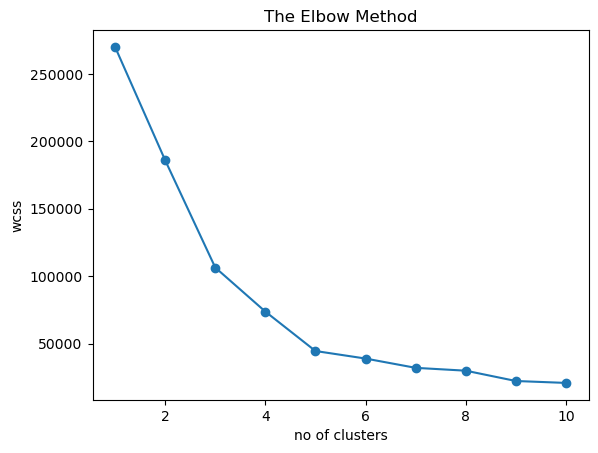

In [8]:
#visualizing the elbow to determine the number of clusters you need to use
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [9]:
#Building the model
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

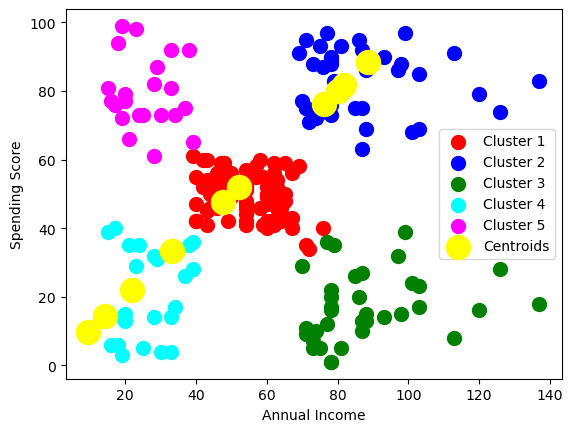

In [10]:

#Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()


### Model Interpretation 
Cluster 1 (Red Color) -> earning high but spending less              
cluster 2 (Blue Colr) -> average in terms of earning and spending              
cluster 3 (Green Color) -> earning high and also spending high [TARGET SET]             
cluster 4 (cyan Color) -> earning less but spending more                
Cluster 5 (magenta Color) -> Earning less , spending less                 
                                                                 
****We can put Cluster 3 into some alerting system where email can be send to them on daily basis as these are easy to converse, wherein others we can set like once in a week or once in a month****    

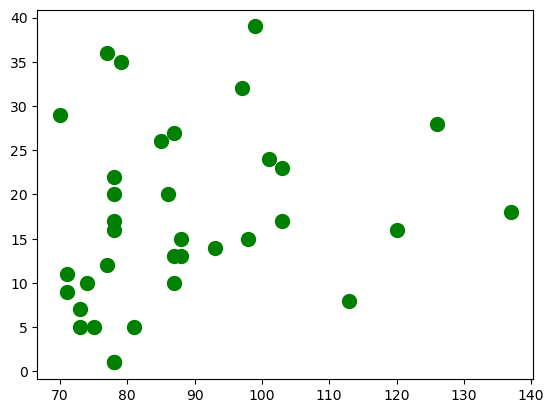

In [11]:
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

In [14]:
# Display points for each cluster
for i in range(max(y_kmeans) + 1):  # Loop through each cluster
    print(f"\nPoints in Cluster {i + 1}:\n", X[y_kmeans == i])



Points in Cluster 1:
 [[39 61]
 [40 55]
 [40 47]
 [40 42]
 [40 42]
 [42 52]
 [42 60]
 [43 54]
 [43 60]
 [43 45]
 [43 41]
 [44 50]
 [44 46]
 [46 51]
 [46 46]
 [46 56]
 [46 55]
 [47 52]
 [47 59]
 [48 51]
 [48 59]
 [48 50]
 [48 48]
 [48 59]
 [48 47]
 [49 55]
 [49 42]
 [50 49]
 [50 56]
 [54 47]
 [54 54]
 [54 53]
 [54 48]
 [54 52]
 [54 42]
 [54 51]
 [54 55]
 [54 41]
 [54 44]
 [54 57]
 [54 46]
 [57 58]
 [57 55]
 [58 60]
 [58 46]
 [59 55]
 [59 41]
 [60 49]
 [60 40]
 [60 42]
 [60 52]
 [60 47]
 [60 50]
 [61 42]
 [61 49]
 [62 41]
 [62 48]
 [62 59]
 [62 55]
 [62 56]
 [62 42]
 [63 50]
 [63 46]
 [63 43]
 [63 48]
 [63 52]
 [63 54]
 [64 42]
 [64 46]
 [65 48]
 [65 50]
 [65 43]
 [65 59]
 [67 43]
 [67 57]
 [67 56]
 [67 40]
 [69 58]
 [71 35]
 [72 34]
 [76 40]]

Points in Cluster 2:
 [[ 69  91]
 [ 70  77]
 [ 71  95]
 [ 71  75]
 [ 71  75]
 [ 72  71]
 [ 73  88]
 [ 73  73]
 [ 74  72]
 [ 75  93]
 [ 76  87]
 [ 77  97]
 [ 77  74]
 [ 78  90]
 [ 78  88]
 [ 78  76]
 [ 78  89]
 [ 78  78]
 [ 78  73]
 [ 79  83]
 [ 8